<div align="center">

# <span style="color: #3498db;">CA2 - Genetic & Game</span>

**<span style="color:rgb(247, 169, 0);">Erfan Falahati</span> - <span style="color:rgb(143, 95, 195);">810102491</span>**

</div>


<div style="font-family: Arial, sans-serif; line-height: 1.6;">

### 📊 Matplotlib – Data Visualization in Python  

matplotlib is a python library that is mainly used for data visualization. This library allows you to plot different type of figures including scatters and histograms. In the first part of this project you are supposed to implement a genetic algorithm. To visualize plots that are required in the project description use plotting as much as you can because it gives a great insight on what is happening during each run. It also helps you to compare your results whenevever you want to understand effect of different parameters during different runs.
For more information, check [this notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) and visit [the website](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py).

In [14]:
import matplotlib.pyplot as plt

# <span style="color: #3498db;">Genetic Algorithm</span>

In [15]:
import random
import itertools
import numpy as np

In [16]:
# algorithm parameters
numCoeffs = 43
coeffsRange = (-5, 5)
populationSize = 100
generations = 50
mutationRate = 0.15
crossoverRate = 0.8
eliteCount = 5
functionRange = (-np.pi, np.pi)
sampleCount = 100

In [17]:
# These functions are given as samples to use in the algorithm
def getTargetFunction(functionName="sin_cos"):
    def sinCosFunction(t):
        """Target function: sin(2πt) + 0.5*cos(4πt)."""
        return np.sin(2 * np.pi * t) + 0.5 * np.cos(4 * np.pi * t)

    def linearFunction(t):
        """Simple linear function: y = 2t + 1."""
        return 2 * t + 1

    def quadraticFunction(t):
        """Quadratic function: y = 4t^2 - 4t + 2."""
        return 4 * (t**2) - 4 * t + 2

    def cubicFunction(t):
        """Cubic function: y = 8t^3 - 12t^2 + 6t."""
        return 8 * (t**3) - 12 * (t**2) + 6 * t

    def gaussianFunction(t):
        """Gaussian function centered at t=0.5."""
        mu = 0.5
        sigma = 0.1  # Adjust sigma to control the width of the peak
        return np.exp(-((t - mu) ** 2) / (2 * sigma**2))

    def squareWaveFunction(t):
        """Approximation of a square wave. Smoothed for better Fourier approximation."""
        return 0.5 * (np.sign(np.sin(2 * np.pi * t)) + 1)

    def sawtoothFunction(t):
        """Sawtooth wave, normalized to [0, 1]."""
        return (t * 5) % 1

    def complexFourierFunction(t):
        return (
            np.sin(2 * np.pi * t)
            + 0.3 * np.cos(4 * np.pi * t)
            + 0.2 * np.sin(6 * np.pi * t)
            + 0.1 * np.cos(8 * np.pi * t)
        )

    def polynomialFunction(t):
        return 10 * (t**5) - 20 * (t**4) + 15 * (t**3) - 4 * (t**2) + t + 0.5

    functionOptions = {
        "sin_cos": sinCosFunction,
        "linear": linearFunction,
        "quadratic": quadraticFunction,
        "cubic": cubicFunction,
        "gaussian": gaussianFunction,
        "square_wave": squareWaveFunction,
        "sawtooth": sawtoothFunction,
        "complex_fourier": complexFourierFunction,
        "polynomial": polynomialFunction,
    }

    selectedFunction = functionOptions.get(functionName.lower())
    if selectedFunction:
        return selectedFunction

In [18]:
# generate samples
tSamples = np.linspace(functionRange[0], functionRange[1], sampleCount)
fSamples = getTargetFunction()(tSamples)

<div style="color:rgb(235, 66, 32); font-weight: bold;">⚠️ Important Note:</div>  

Using **NumPy arrays** allows you to perform operations on vectors **more efficiently** and **faster**.

**Avoid using `for` loops** whenever possible, as vectorized operations in NumPy are **optimized for performance** and significantly reduce execution time.  


In [19]:
#TODO: Implement the rest of the algorithm

**sampling from coeffRange to struct a population**

In [20]:
def fourier_series(t, coefficients):
    a0 = coefficients[0]
    sum_terms = a0 / 2
    for n in range(1, 22):
        an = coefficients[n]
        bn = coefficients[n + 21]
        sum_terms += an * np.cos(n * t) + bn * np.sin(n * t)
    return sum_terms

def FitnessScore(population: np.array):
    fitness_score = []

    for individual in population:
        approximated = fourier_series(tSamples, individual)
        rmse = np.sqrt(np.mean((fSamples - approximated) ** 2))
        fitness_score.append(1/(rmse + 1))

    return np.array(fitness_score)

**Next Generation**

In [21]:
def select_parents(population, tournament_size=3):
    def tournament():
        indices = np.random.choice(population.shape[0], size=tournament_size, replace=False)
        candidates = population[indices]
        fitnesses = FitnessScore(candidates)
        best_index = np.argmax(fitnesses)
        return candidates[best_index]
    
    parent1 = tournament()
    parent2 = tournament()

    return parent1, parent2

def crossover(parent1, parent2, rate=crossoverRate):
    if np.random.random() > rate:
        return parent1.copy(), parent2.copy()
    point = np.random.randint(1, 43)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

def mutate(genotype, rate=mutationRate):
    mutation_mask = np.random.rand(len(genotype)) < rate
    genotype[mutation_mask] = np.random.uniform(coeffsRange[0], coeffsRange[1])
    return genotype

def create_new_generation(population: np.array, fitness_scores: np.array):
    new_population = []
    
    elite_indices = np.argsort(fitness_scores)[-eliteCount:] 
    for idx in elite_indices: 
        elite = population[idx].copy()
        new_population.append(elite)
        

    while len(new_population) < populationSize:
        parent1, parent2 = select_parents(population)
        child1, child2 = crossover(parent1, parent2)

        child1 = mutate(child1)
        child2 = mutate(child2)
        
        new_population.extend([child1, child2])

    return np.array(new_population[:populationSize])


***Gen Algorithem***

In [22]:
def genetic_algorithm(generations):
    population = np.random.uniform(coeffsRange[0], coeffsRange[1], size=(populationSize, 43))
    best_fitness_history = []
    
    for _ in range(generations):
        fitness_scores = FitnessScore(population)
        best_idx = np.argmax(fitness_scores)
        best_fitness_history.append(fitness_scores[best_idx])
        population = create_new_generation(population, fitness_scores)

    final_fitnesses = FitnessScore(population)
    best_idx = np.argmax(final_fitnesses)

    return population[best_idx], best_fitness_history

In [23]:
best_solution, fitness_history = genetic_algorithm(300)

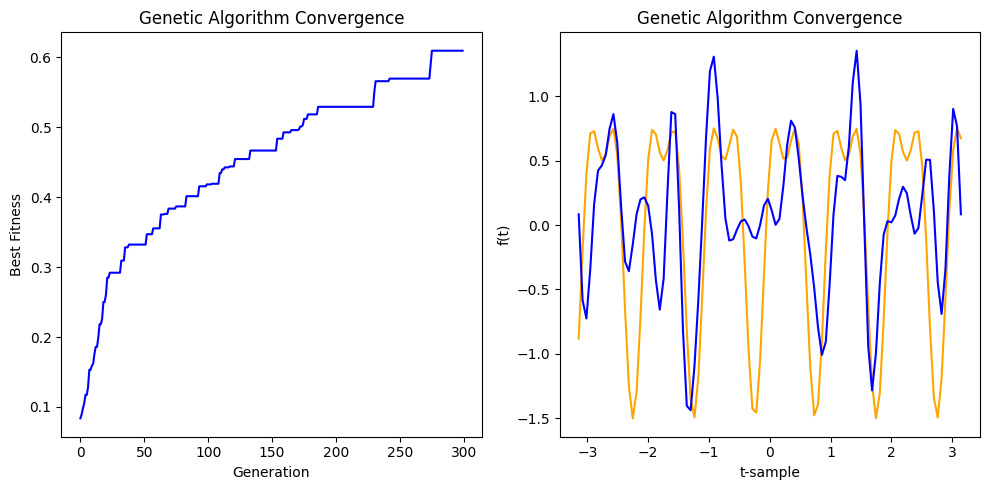

In [24]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fitness_history, label="Best Fitness per Generation", color='blue')
plt.title("Genetic Algorithm Convergence")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.subplot(1, 2, 2)
plt.plot(tSamples, fSamples, label="", color='orange')
plt.plot(tSamples, fourier_series(tSamples, best_solution), label="", color='blue')
plt.title("Genetic Algorithm Convergence")
plt.xlabel("t-sample")
plt.ylabel("f(t)")
plt.tight_layout()
plt.show()

# <span style="color: #3498db;">Minmax Algorithm</span>

In [25]:
class PentagoGame:
    def __init__(self, ui=False, print=False, depth=2):
        self.board = np.zeros((6, 6), dtype=int)
        self.current_player = 1
        self.ui = ui
        self.depth = depth
        self.nodes_visited = 0
        self.game_over = False
        self.result = None
        self.selected_block = None  
        self.move_stage = 0  # 0: place piece, 1: select block, 2: rotate
        self.temp_piece = None
        self.print = print

        if ui:
            pygame.font.init()
            self.screen = pygame.display.set_mode((800, 600))
            pygame.display.set_caption("Pygame Board")
            # self.font = pygame.font.SysFont("Arial", 20)
            self.show_buttons = False
            self.buttons = {
                "rotate_cw": pygame.Rect(650, 200, 100, 50),
                "rotate_ccw": pygame.Rect(650, 300, 100, 50),
            }
            self.setup_controls()
            self.draw_board()

    def setup_controls(self):
        if self.show_buttons:
            pygame.draw.rect(self.screen, (144, 238, 144), self.buttons["rotate_cw"])   # Light Green
            pygame.draw.rect(self.screen, (173, 216, 230), self.buttons["rotate_ccw"])  # Light Blue

            self.screen.draw_text("CLOCKWISE", self.buttons["rotate_cw"].center)
            self.screen.draw_text("COUNTER-CLOCKWISE", self.buttons["rotate_ccw"].center)



    def hide_rotation_buttons(self):
        self.show_buttons = False

    def show_rotation_buttons(self):
        self.show_buttons = True

    def copy_board(self, board):
        return np.copy(board)

    def rotate_block(self, board, block, direction):
        row_start = (block // 2) * 3
        col_start = (block % 2) * 3
        sub = board[row_start : row_start + 3, col_start : col_start + 3]
        rotated = np.rot90(sub, 3 if direction == "cw" else 1)
        board[row_start : row_start + 3, col_start : col_start + 3] = rotated

    def get_possible_moves(self, board, player):
        moves = []
        for i in range(6):
            for j in range(6):
                if board[i][j] == 0:
                    for block in range(4):
                        for dir in ["cw", "ccw"]:
                            moves.append((i, j, block, dir))
        return moves

    def apply_move(self, board, move, player):
        new_board = self.copy_board(board)
        row, col, block, direction = move
        if new_board[row][col] != 0:
            return None
        new_board[row][col] = player
        self.rotate_block(new_board, block, direction)
        return new_board

    def check_winner(self, board):
        for i in range(6):
            for j in range(6):
                if board[i][j] == 0:
                    continue

                # Horizontal
                if j <= 1 and np.all(board[i, j : j + 5] == board[i][j]):
                    return board[i][j]

                # Vertical
                if i <= 1 and np.all(board[i : i + 5, j] == board[i][j]):
                    return board[i][j]

                # Diagonal
                if (
                    i <= 1
                    and j <= 1
                    and all(board[i + k][j + k] == board[i][j] for k in range(5))
                ):
                    return board[i][j]

                # Anti-diagonal
                if (
                    i <= 1
                    and j >= 4
                    and all(board[i + k][j - k] == board[i][j] for k in range(5))
                ):
                    return board[i][j]
        if np.all(board != 0):
            return 0
        return None

    def minimax(self):
        if self.game_over:
            return 0

        self.nodes_visited += 1
        #TODO: Implement minmax algorithm

    def get_computer_move(self):
        start_time = time.time()
        best_move = None
        best_value = -inf
        
        moves = self.get_possible_moves(self.board, -1)
        if not moves:
            return None
        best_move = moves[0]

        for move in moves:
            if self.game_over:
                break
            new_board = self.apply_move(self.board, move, -1)
            if new_board is None:
                continue

            try:
                value = self.minimax()
                #TODO: Implement alpha-beta pruning algorithm
            except:
                value = -inf

            if value > best_value:
                best_value = value
                best_move = move

        if self.print == True:
            print(f"Move took {time.time()-start_time:.2f}s, nodes visited: {self.nodes_visited}")
        self.nodes_visited = 0
        return best_move

    def draw_text(self, text, center_pos, max_width):
        font_size = 24
        font = pygame.font.Font(None, font_size)
        text_surface = font.render(text, True, (0, 0, 0))

        text_width = text_surface.get_width()
        if text_width > max_width:
            scale_factor = max_width / text_width
            new_font_size = int(font_size * scale_factor)
            font = pygame.font.Font(None, new_font_size)
            text_surface = font.render(text, True, (0, 0, 0))

        text_rect = text_surface.get_rect(center=center_pos)
        self.screen.blit(text_surface, text_rect)

    def draw_board(self):
        self.screen.fill((0, 0, 0))

        for i in range(6):
            for j in range(6):
                x0 = j * 100
                y0 = i * 100

                if self.board[i][j] == 1:
                    pygame.draw.circle(self.screen, (255, 0, 0), (x0 + 50, y0 + 50), 40)
                elif self.board[i][j] == -1:
                    pygame.draw.circle(self.screen, (0, 0, 255), (x0 + 50, y0 + 50), 40)

                pygame.draw.rect(self.screen, (255, 255, 255), (x0, y0, 100, 100), 1)

        for i in [3, 6]:
            pygame.draw.line(self.screen, (255, 255, 255), (0, i * 100), (600, i * 100), 3)  # Horizontal
            pygame.draw.line(self.screen, (255, 255, 255), (i * 100, 0), (i * 100, 600), 3)  # Vertical

        # Show rotation buttons if in move_stage 2
        if self.move_stage == 2:
            self.highlight_selected_block()
            self.show_rotation_buttons()

        if self.show_buttons:
            pygame.draw.rect(self.screen, (144, 238, 144), self.buttons["rotate_cw"])  # Light Green
            pygame.draw.rect(self.screen, (173, 216, 230), self.buttons["rotate_ccw"])  # Light Blue

            self.draw_text(
                "CLOCKWISE",
                self.buttons["rotate_cw"].center,
                self.buttons["rotate_cw"].width,
            )
            self.draw_text(
                "COUNTER-CLOCKWISE",
                self.buttons["rotate_ccw"].center,
                self.buttons["rotate_ccw"].width,
            )

    def click_handler(self, event):
        if self.game_over or self.current_player != 1:
            return

        x, y = event.pos
        if self.move_stage == 0:  # Place piece
            if x > 600:
                return  # clicks on control area
            col = x // 100
            row = y // 100
            if 0 <= row < 6 and 0 <= col < 6 and self.board[row][col] == 0:
                self.temp_piece = (row, col)
                self.board[row][col] = 1
                self.move_stage = 1
                self.draw_board()

        elif self.move_stage == 1:  # Select block
            if x > 600:
                return
            # which block was clicked
            block_x = 0 if x < 300 else 1
            block_y = 0 if y < 300 else 1
            self.selected_block = block_y * 2 + block_x
            self.move_stage = 2
            self.show_rotation_buttons()
            self.highlight_selected_block()

        elif self.move_stage == 2:  # Rotate
            if self.buttons["rotate_cw"].collidepoint(event.pos):
                self.apply_rotation("cw")
            if self.buttons["rotate_ccw"].collidepoint(event.pos):
                self.apply_rotation("ccw")

    def apply_rotation(self, direction):
        self.rotate_block(self.board, self.selected_block, direction)
        self.current_player = -1
        self.move_stage = 0
        self.selected_block = None
        self.temp_piece = None
        self.hide_rotation_buttons()
        self.draw_board()
        pygame.display.flip()
        self.check_game_over()
        pygame.time.delay(1000)
        self.play_computer_move()

    def highlight_selected_block(self):
        colors = [
            (255, 153, 153),
            (153, 255, 153),
            (153, 153, 255),
            (255, 255, 153),
        ]  # RGB colors

        row_start = (self.selected_block // 2) * 3
        col_start = (self.selected_block % 2) * 3

        pygame.draw.rect(
            self.screen,
            colors[self.selected_block],
            (col_start * 100, row_start * 100, 300, 300),
            5,
        )

    def play_computer_move(self):
        move = self.get_computer_move()
        if move and not self.game_over:
            new_board = self.apply_move(self.board, move, -1)
            if new_board is not None:
                self.board = new_board
                self.current_player = 1
                self.draw_board()
                pygame.display.flip()
                self.check_game_over()
            else:
                print("Invalid computer move!")

    def check_game_over(self):
        winner = self.check_winner(self.board)
        if winner is not None:
            self.game_over = True
            self.result = winner
            print("Game over! Result:", winner)
            if self.ui:
                self.show_game_over_message()

    def show_game_over_message(self):
        self.screen.fill((200, 200, 200))
        pygame.draw.rect(self.screen, (255, 255, 255), (100, 200, 500, 200))
        pygame.draw.rect(self.screen, (0, 0, 0), (100, 200, 500, 200), 3)

        result_text = f"Player {self.result} wins!" if self.result != 0 else "Draw!"
        text_surface = self.font_large.render(result_text, True, (255, 0, 0))
        self.screen.blit(text_surface, (250, 250))

        exit_text = self.font_small.render("Click anywhere to exit", True, (0, 0, 0))
        self.screen.blit(exit_text, (230, 350))
        pygame.display.flip()

    def play(self):
        if self.ui:
            running = True
            while running:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        running = False
                    elif event.type == pygame.MOUSEBUTTONDOWN:
                        self.click_handler(event)
                self.draw_board()
                pygame.display.flip()
            pygame.quit()
            return self.result
        else:
            while not self.game_over:
                self.print_board()
                winner = self.check_winner(self.board)
                if winner is not None:
                    return winner

                if self.current_player == 1:
                    move = random.choice(self.get_possible_moves(self.board, 1))
                else:
                    move = self.get_computer_move()

                self.board = self.apply_move(self.board, move, self.current_player)
                self.current_player *= -1
            return self.result

    def print_board(self):
        if self.print == False:
            return
        print("-" * 25)
        for row in self.board:
            print(" ".join(f"{x:2}" for x in row))
        print("-" * 25)

In [26]:
game = PentagoGame(ui=False, print=False, depth=2)  # depth=2 for faster
numGames = 100
numWins, numTies, numLosses = 0, 0, 0
for i in range(numGames):
    result = game.play()
    if result == 1:
        numWins += 1
    elif result == 0:
        numTies += 1
    else:
        numLosses += 1

print(f"{numWins} wins, {numTies} ties, {numLosses} losses")

NameError: name 'time' is not defined